In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [3]:
## Load Training Data
TRAIN_DATA_X = np.loadtxt(open("a1-files/spambase_X.csv"), delimiter=",")
TRAIN_LABEL_y = np.loadtxt(open("a1-files/spambase_y.csv"), delimiter=",")
# We need to transpose X 
TRAIN_DATA_X = np.transpose(TRAIN_DATA_X)

In [7]:
def perceptron(
    X: List[List[float]], 
    y: List[int], 
    max_pass=500
)-> [List[float], float, List[int]]:
    """
    @param          X: \in R^{nxd}
    @param          y: \in {-1,1}^n 
    @param   max_pass: \in N
    """
    X = np.array(X)
    y = np.array(y)
    [n, d] = np.shape(X)
    w = [0] * d # w = 0_d
    b = 0
    mistake = []
    for t in range(0, max_pass): # max passes / iterations
        mistake.append(0)
        for i in range(0, n):
            x_i = X[i, :]
            if (y[i] * (np.dot(x_i, w) + b)) <= 0:
                w = w + y[i] * x_i
                b = b + y[i]
                mistake[t] += 1
    
    return w, b, mistake

In [8]:
w, b, mistake = perceptron(X=TRAIN_DATA_X, y=TRAIN_LABEL_y)

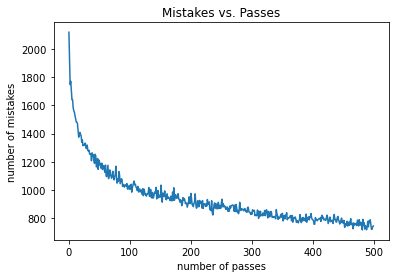

In [9]:
fig1, ax1 = plt.subplots()
ax1.plot((mistake))
ax1.set_title("Mistakes vs. Passes")
ax1.set_xlabel("number of passes")
ax1.set_ylabel("number of mistakes")
plt.savefig('figs/ex1_result.png')